## Trabalho Computacional para previsão de notas de vinho

Bibliotecas e funções usadas

In [28]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
from d2l import tensorflow as d2l
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 1
class LinearRegressionData(d2l.DataModule):
    """ implementacao do DataModule pra dados externos
    Defined in :numref:`sec_synthetic-regression-data`"""
    
    def __init__(self,
                entrada,
                saida,
                num_train=5197,
                num_val=1300,
                batch_size=32):
        super().__init__()
        self.save_hyperparameters(['tensor'])
        self.X = entrada
        self.y = saida
# 2
    def get_dataloader(self, train):
        """Defined in :numref:`sec_synthetic-regression-data`"""
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader((self.X, self.y), train, i)

Primeiro, vamos abrir o arquivo

In [29]:
# Nome do arquivo e onde está localizado
arquivo_csv = os.path.expanduser('winequalityN.csv') 

data = pd.read_csv(arquivo_csv)
data

,Tipo,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Vamos printar uma linha aleátoria para visualizarmos antes e depois dos dados serem tratados

In [30]:
print('Antes de completar os dados faltantes e tratar os dados')
print(
    
)
linha_faltante = data.iloc[139]
print(linha_faltante)

Antes de completar os dados faltantes e tratar os dados

Tipo                     white
fixed acidity              8.1
volatile acidity          0.28
citric acid               0.39
residual sugar             1.9
chlorides                0.029
free sulfur dioxide       18.0
total sulfur dioxide      79.0
density                 0.9923
pH                         NaN
sulphates                 0.52
alcohol                   11.8
quality                      6
Name: 139, dtype: object


Vamos fazer algumas substituíções de algumas colunas e tratar os dados

1) Vamos substituir os tipo de vinho 

In [31]:
data = pd.get_dummies(data) #Colocando variaveis do tp dummy
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Tipo_red,Tipo_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,False,True
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,False,True
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,False,True
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,False,True
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,True,False
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,True,False
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,True,False
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,True,False


2) Substituir as celulas vazias pela média da coluna

In [32]:
data = data.fillna(data.mean())  #substitui células vazias pela média da coluna
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Tipo_red,Tipo_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,False,True
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,False,True
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,False,True
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,False,True
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,True,False
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,True,False
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,True,False
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,True,False


3) A qualidade é rescrita para valores entre 1 e 7 invés de 3 a 9, como era anteriormente

In [33]:
data['quality'] -= 2
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Tipo_red,Tipo_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,4,False,True
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,4,False,True
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,4,False,True
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,4,False,True
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,4,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,3,True,False
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,4,True,False
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,4,True,False
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,3,True,False


Agora vamos analisar a mesma linha. porém os dados foram tratados 

In [34]:
print('Depois de completar os dados faltantes')
print(
    
)
linha_completa = data.iloc[139]
print(linha_completa)

Depois de completar os dados faltantes

fixed acidity                8.1
volatile acidity            0.28
citric acid                 0.39
residual sugar               1.9
chlorides                  0.029
free sulfur dioxide         18.0
total sulfur dioxide        79.0
density                   0.9923
pH                      3.218395
sulphates                   0.52
alcohol                     11.8
quality                        4
Tipo_red                   False
Tipo_white                  True
Name: 139, dtype: object


Agora com os dados tratados iremos dividir em treinamento e validação

In [35]:
treinamento, validacao = train_test_split(data,test_size=0.2)
print(f'Dados utilizados para treinamento --> {treinamento.shape}')
print(
    
)
print(f'Dados utilizados para validação --> {validacao.shape}')


Dados utilizados para treinamento --> (5197, 14)

Dados utilizados para validação --> (1300, 14)


In [36]:
conjunto_de_dados = data.copy()

saida = conjunto_de_dados.pop('quality') # Copia os dados de qualidade (saída) 
saida = tf.constant(saida.to_numpy(dtype=float)) # Transforma em uma matriz
print('Matriz de saida')
print(saida)

print(
    
)

entrada = conjunto_de_dados # Faz uma entrada com todos os dados restante (lembrando que separamos a 'quality'), então não temos essa coluna
entrada = tf.constant(entrada.to_numpy(dtype=float)) # Transforma em uma matriz
print('Matriz de entrada')
print(entrada)
print(
    
)

lr_dados = LinearRegressionData(entrada, saida, num_train=treinamento.shape[0], num_val=validacao.shape[0] ,batch_size=32)

Matriz de saida
tf.Tensor([4. 4. 4. ... 4. 3. 4.], shape=(6497,), dtype=float64)

Matriz de entrada
tf.Tensor(
[[ 7.     0.27   0.36  ...  8.8    0.     1.   ]
 [ 6.3    0.3    0.34  ...  9.5    0.     1.   ]
 [ 8.1    0.28   0.4   ... 10.1    0.     1.   ]
 ...
 [ 6.3    0.51   0.13  ... 11.     1.     0.   ]
 [ 5.9    0.645  0.12  ... 10.2    1.     0.   ]
 [ 6.     0.31   0.47  ... 11.     1.     0.   ]], shape=(6497, 13), dtype=float64)



Agora, vamos criar o módelo de Regressão Linear

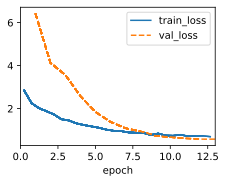

In [37]:
# Criando o modelo de regressão linear 
taxa_de_aprendizado = 2e-5
modelo = d2l.LinearRegression(lr=taxa_de_aprendizado)


# Treinando o modelo 
num_de_leituras = 13


treinador = d2l.Trainer(max_epochs=num_de_leituras)
# O parametro max_epoch me diz o número de vezes que meus dados seram lidos

treinador.fit(modelo,lr_dados)

Com o modelo criado e treinado vamos analisar seu desempenho

Fazemos as previsões

In [69]:
val_dados = validacao.copy() # Uma cópia dos dados de validação é criada e, isso é feito para que as mudanças nos dados não afete os originais

Yo = tf.cast(val_dados.pop('quality'), dtype=tf.float32) # Separa a saída
val_dados = tf.constant(val_dados.to_numpy(dtype=float)) 

# Fazendo previsões
previsao = modelo.call(val_dados)
previsao = tf.cast(previsao, dtype=tf.float32)

Com as previsões prontas vamos analisar os resultados obtidos e compara-los com os esperados,os resultados do treinamento são avaliados por meio de:
- Erro Médio Absoluto (MAE), calculado pela norma $L_1$:
    $$
    L_{1} = \overline{y_{predição} - y_{real}}
    $$
- Função Custo, ou Erro Quadrático Médio (MSE):
  $$
    loss = L_{2} = \overline{(y_{predição} - y_{real})^2}
  $$
- Média das saídas esperadas (Preditor Trivial):
  $$
  \overline{y_{real}}
  $$

In [96]:
# 1 --> Média dos valores da saída
preditor_trivial = np.mean(saida) 
#Transformando num tensor
previsao = tf.transpose(previsao)

# 2 --> Erro médio absoluto
mae = np.mean(np.abs(previsao - Yo)) 

# 3 --> Erro médio quadrático 
mse = modelo.loss(previsao, Yo) 

#Criando a matriz de ccorrelação
matriz_de_correlacao = data.corr() # Valores entre 1 e -1 para indicar o quanto o parametro afeta o resultado final

print(f'A média dos valores de saída é {preditor_trivial}')
print(f'O erro médio absoluto (MAE) é {mae}')
print(f'O erro médio quadrático (MSE){mse}')

A média dos valores de saída é 3.8183777127905185
O erro médio absoluto (MAE) é 0.6767988801002502
O erro médio quadrático (MSE)0.7213343977928162


Vamos fazer a comparação entre os valores obtidos e os valores reais

In [98]:
print(f'Valores reais: {Yo}')
print(f'Valores previstos:{previsao}')

Valores reais: [3. 3. 4. ... 3. 4. 4.]
Valores previstos:[[4.129064  3.8141139 4.274051  ... 4.1543927 4.299695  4.2284775]]


Agora vamos observar a matriz de correlação para podermos observar o quanto alguns parametros inlfuenciam diretamente na saída final

In [60]:
matriz_de_correlacao

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Tipo_red,Tipo_white
fixed acidity,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.283237,-0.329409,0.458941,-0.251683,0.300225,-0.095560,-0.076967,0.486913,-0.486913
volatile acidity,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.353055,-0.414706,0.271107,0.260283,0.225313,-0.038215,-0.265838,0.652606,-0.652606
citric acid,0.323349,-0.377759,1.000000,0.142451,0.039310,0.133426,0.195148,0.096307,-0.328354,0.057564,-0.010431,0.085699,-0.187073,0.187073
residual sugar,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.403242,0.495704,0.552487,-0.266717,-0.185716,-0.359656,-0.036819,-0.348982,0.348982
chlorides,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.194978,-0.279547,0.362580,0.044754,0.395073,-0.256844,-0.200818,0.512596,-0.512596
free sulfur dioxide,-0.283237,-0.353055,0.133426,0.403242,-0.194978,1.000000,0.720934,0.025717,-0.145116,-0.188471,-0.179838,0.055463,-0.471644,0.471644
total sulfur dioxide,-0.329409,-0.414706,0.195148,0.495704,-0.279547,0.720934,1.000000,0.032395,-0.237523,-0.275291,-0.265740,-0.041385,-0.700357,0.700357
density,0.458941,0.271107,0.096307,0.552487,0.362580,0.025717,0.032395,1.000000,0.011913,0.259432,-0.686745,-0.305858,0.390645,-0.390645
pH,-0.251683,0.260283,-0.328354,-0.266717,0.044754,-0.145116,-0.237523,0.011913,1.000000,0.191075,0.120939,0.019356,0.328514,-0.328514
sulphates,0.300225,0.225313,0.057564,-0.185716,0.395073,-0.188471,-0.275291,0.259432,0.191075,1.000000,-0.003261,0.038713,0.486662,-0.486662
